In [1]:
# Logistic regression : supervised ml algorithm primarily used for binary classification.
# Perceptron Trick to implement logistic regression.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

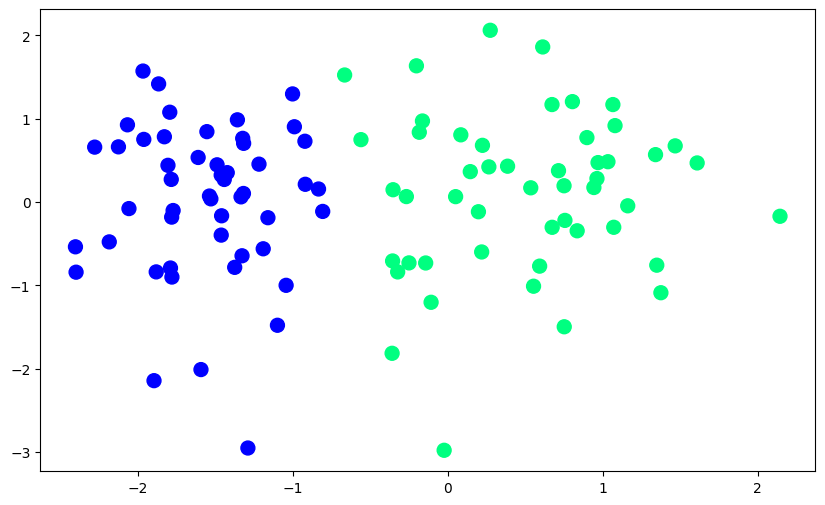

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

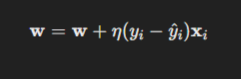

In [4]:
from IPython.display import Image
Image(filename='images/perceptron trick.png')
# weights/coefficients are updated as :

In [20]:
# step function is used . It returns either 0 or 1 . When it returns 0, y - y_hat will be 0 so no update to coefficients in that case .
def step(z):
    return 1 if z>0 else 0

In [21]:
#                                 Custom Class For Perceptron Trick 
def perceptron(X,y):
    
    X = np.insert(X, 0 ,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
    return weights[0],weights[1:]

[1.0268101  0.40381514]
1.2000000000000002


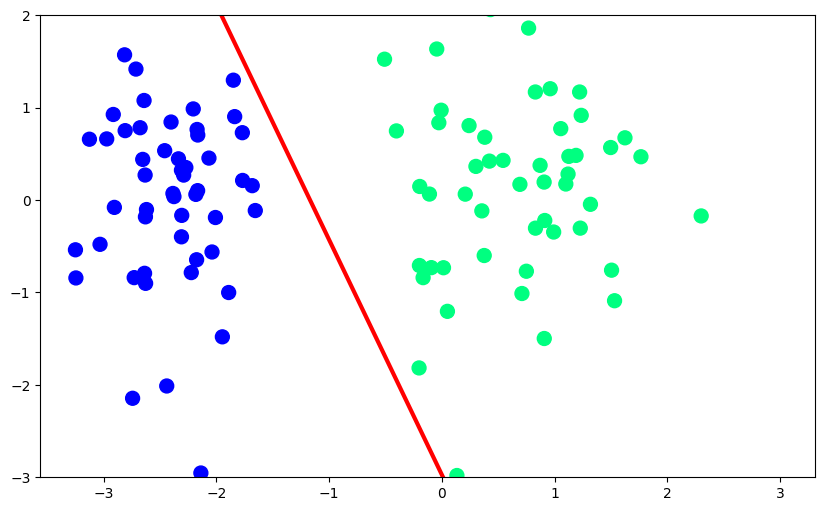

In [22]:
intercept_, coef_ = perceptron(X,y)
print(coef_)
print(intercept_) 

m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.show()

In [23]:
# As all missclassified data are addressed this perceptron Trick stops improving i.e separation line do not find best possible position .
# Which is its main Flaw . But scikit-learn class works better than this .

In [24]:
#               Implementing Logistic Regression using scikit-learn

(-3.0, 2.0)

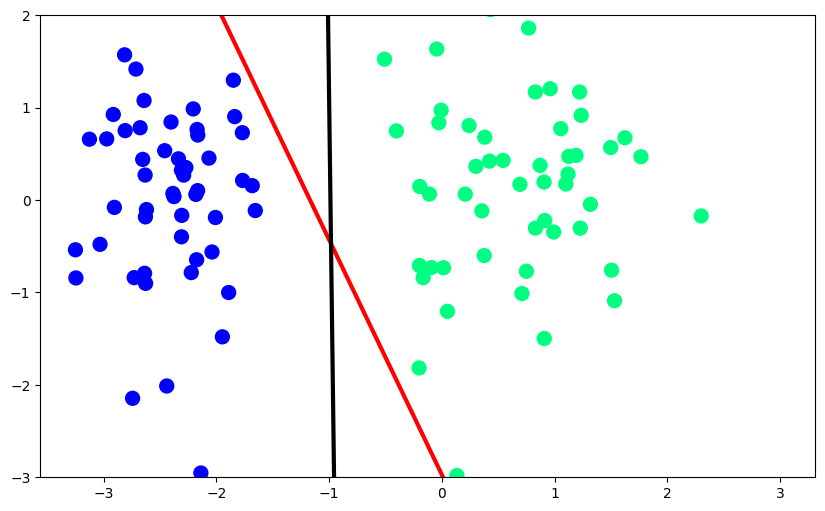

In [25]:
from sklearn.linear_model import LogisticRegression
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=15)
lor = LogisticRegression()
lor.fit(X,y)

m = -(lor.coef_[0][0] / lor.coef_[0][1])
b = -(lor.intercept_ / lor.coef_[0][1])

x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='black', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

In [26]:
# class_sep = 15 
# red separation line is due to Perceptron Trick and black is from scikit-learn . 
# even after correct classification of all points . Black line improves itself at best possible position .

In [27]:
# Now lets Improve this model. Using Sigmoid function instead of step function . Now y - y_hat will not be 0 like in using step function .
# Now correctly classified points push line away from it. magnitude of push will be more if correctly classified point is near to line and vice varsa.

In [32]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [33]:
#                               Custom Class For Perceptron Trick using sigmoid function
def perceptron(X, y):
    
    X = np.insert(X, 0, 1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
    return weights[0], weights[1:]

(-3.0, 2.0)

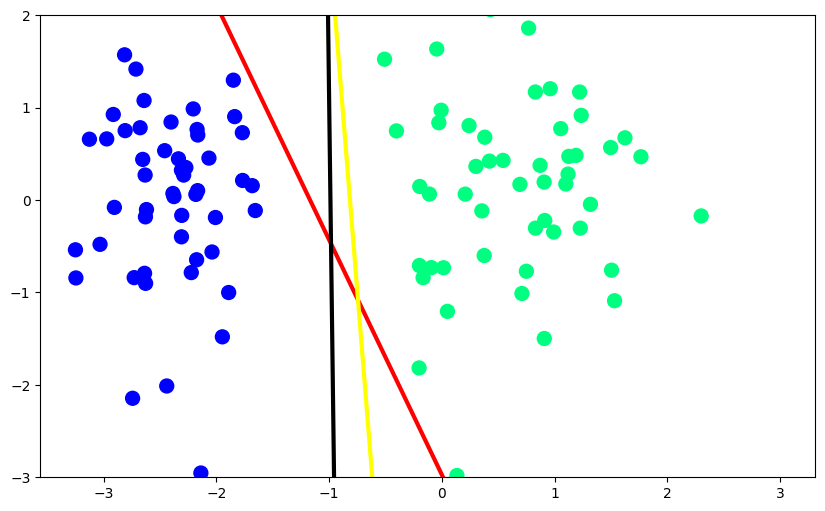

In [30]:
intercept_,coef_ = perceptron(X,y)

m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

x_input2 = np.linspace(-3, 3, 100)
y_input2 = m * x_input + b

plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='black', linewidth=3)
plt.plot(x_input2, y_input2, color='yellow', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

In [34]:
# Red --> using step function, yellow --> using sigmoid function, black --> scikit-learn logistic regressioin class.
# Still scikit-learn logistic regression outperforms above 2 Perceptron Trick approaches.
# Its because we dont use any cost function.